In [ ]:
#Solution of Assignment_9
#Instructor: Gopal Hazra
#Computational Physics-PHY617,
#Dept of Physics, IIT Kanpur

#Question-1(a)
import numpy as np
import matplotlib.pyplot as plt

# Pendulum system of ODEs
def pendulum_derivs(t, y, g, L):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = - (g / L) * np.sin(theta)
    return np.array([dtheta_dt, domega_dt])

# RK4 integrator function
def rk4(f, y0, t, g, L):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(n - 1):
        dt = t[i + 1] - t[i]
        k1 = f(t[i], y[i], g, L)
        k2 = f(t[i] + dt/2, y[i] + dt/2 * k1, g, L)
        k3 = f(t[i] + dt/2, y[i] + dt/2 * k2, g, L)
        k4 = f(t[i] + dt, y[i] + dt * k3, g, L)

        y[i + 1] = y[i] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

    return y

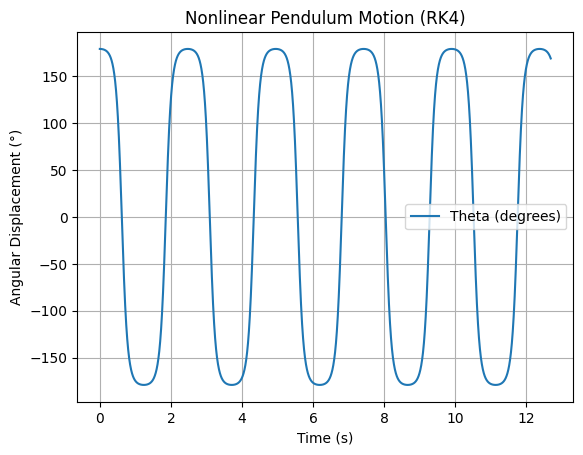

In [ ]:
# Parameters
g = 9.81    # m/s^2
L = 0.1     # m

# Initial conditions
theta0_deg = 179
theta0 = np.radians(theta0_deg)
omega0 = 0.0
y0 = [theta0, omega0]

# Time settings
T = 5*4 * 2 * np.pi * np.sqrt(L / g)  # ~4 full periods
dt = 0.001
t = np.arange(0, T, dt)

# Run simulation
solution = rk4(pendulum_derivs, y0, t, g, L)
theta = solution[:, 0]

# Plot results
plt.plot(t, np.degrees(theta), label='Theta (degrees)')
plt.xlabel('Time (s)')
plt.ylabel('Angular Displacement (°)')
plt.title('Nonlinear Pendulum Motion (RK4)')
plt.grid()
plt.legend()
plt.show()

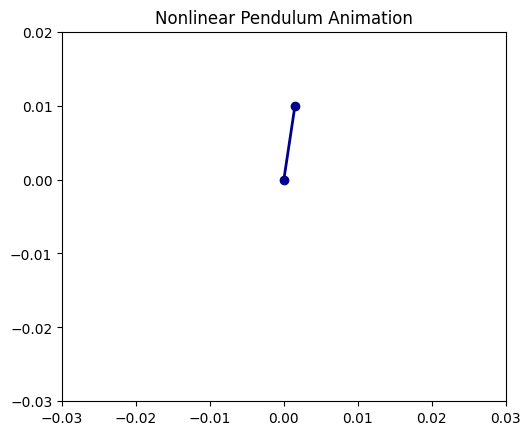

In [ ]:
#1b
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, display

# Pendulum system of ODEs
def pendulum_derivs(t, y, g, L):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = - (g / L) * np.sin(theta)
    return np.array([dtheta_dt, domega_dt])

# RK4 integrator function
def rk4(f, y0, t, g, L):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(n - 1):
        dt = t[i + 1] - t[i]
        k1 = f(t[i], y[i], g, L)
        k2 = f(t[i] + dt/2, y[i] + dt/2 * k1, g, L)
        k3 = f(t[i] + dt/2, y[i] + dt/2 * k2, g, L)
        k4 = f(t[i] + dt, y[i] + dt * k3, g, L)

        y[i + 1] = y[i] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

    return y

# Parameters
g = 9.81    # m/s^2
L = 0.01     # m (length of pendulum)

# Initial conditions
theta0_deg = 179              # degrees from vertical
theta0 = np.radians(theta0_deg)
omega0 = 0.0                  # initial angular velocity
y0 = [theta0, omega0]

# Time settings
T = 10*4 * 2 * np.pi * np.sqrt(L / g)  # simulate ~4 full periods
dt = 0.01
t = np.arange(0, T, dt)

# Run simulation
solution = rk4(pendulum_derivs, y0, t, g, L)
theta = solution[:, 0]

# Convert to Cartesian coordinates
x = L * np.sin(theta)
y = -L * np.cos(theta)

# Create figure and axis for animation
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-L - 0.02, L + 0.02)
ax.set_ylim(-L - 0.02, 0.02)
ax.set_title("Nonlinear Pendulum Animation")

# Pendulum line and bob
line, = ax.plot([], [], 'o-', lw=2, color='darkblue')

# Initialization function for animation
def init():
    line.set_data([], [])
    return line,

# Update function for animation
def update(frame):
    line.set_data([0, x[frame]], [0, y[frame]])
    return line,

# Create the animation
anim = animation.FuncAnimation(
    fig, update, frames=len(x),
    init_func=init, blit=True, interval=10000*dt
)

# Display the animation in Colab
display(HTML(anim.to_html5_video()))

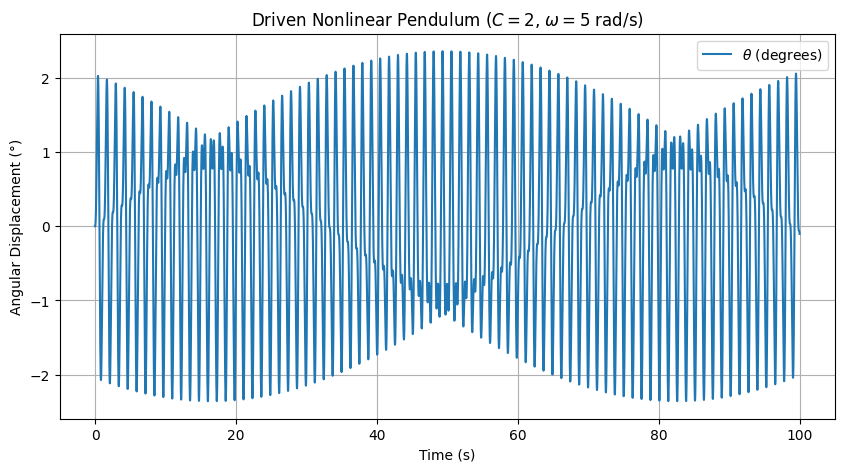

In [ ]:
#1c
import numpy as np
import matplotlib.pyplot as plt

# Driven pendulum ODEs
def driven_pendulum_derivs(t, y, g, L, C, omega_drive):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = - (g / L) * np.sin(theta) + C * np.cos(theta) * np.sin(omega_drive * t)
    return np.array([dtheta_dt, domega_dt])

# RK4 integrator
def rk4(f, y0, t, g, L, C, omega_drive):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(n - 1):
        dt = t[i + 1] - t[i]
        k1 = f(t[i], y[i], g, L, C, omega_drive)
        k2 = f(t[i] + dt/2, y[i] + dt/2 * k1, g, L, C, omega_drive)
        k3 = f(t[i] + dt/2, y[i] + dt/2 * k2, g, L, C, omega_drive)
        k4 = f(t[i] + dt, y[i] + dt * k3, g, L, C, omega_drive)

        y[i + 1] = y[i] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)

    return y

# Parameters
g = 9.81          # m/s^2
L = 0.1           # m
C = 2.0           # s^-2
omega_drive = 5.0 # s^-1

# Initial conditions
theta0 = 0.0
omega0 = 0.0
y0 = [theta0, omega0]

# Time settings
t_max = 100.0
dt = 0.01
t = np.arange(0, t_max, dt)

# Run simulation
solution = rk4(driven_pendulum_derivs, y0, t, g, L, C, omega_drive)
theta = solution[:, 0]

# Plot angular displacement over time
plt.figure(figsize=(10, 5))
plt.plot(t, np.degrees(theta), label=r'$\theta$ (degrees)')
plt.xlabel("Time (s)")
plt.ylabel("Angular Displacement (°)")
plt.title("Driven Nonlinear Pendulum ($C=2$, $\omega=5$ rad/s)")
plt.grid()
plt.legend()
plt.show()

We see highest amplitude at C = 9.5


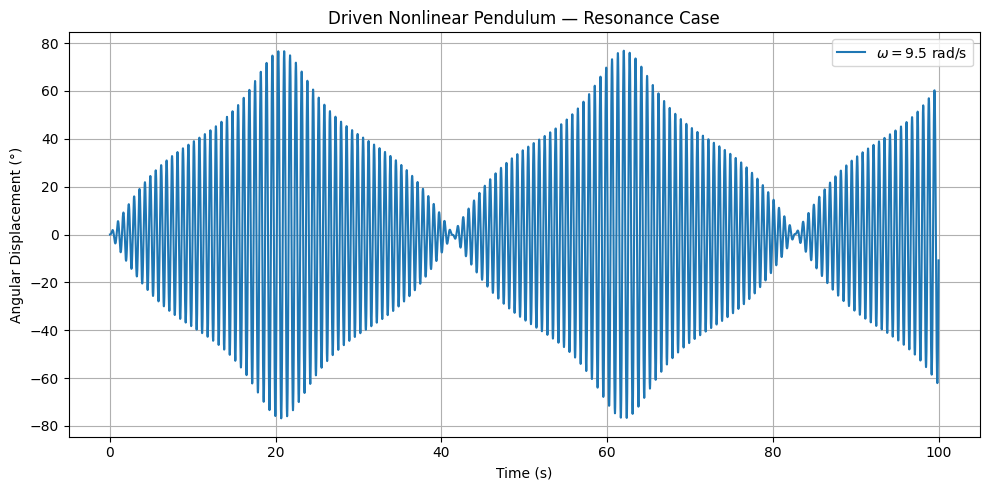

In [ ]:
#1d
import numpy as np
import matplotlib.pyplot as plt

def driven_pendulum_derivs(t, y, g, L, C, omega_drive):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = - (g / L) * np.sin(theta) + C * np.cos(theta) * np.sin(omega_drive * t)
    return np.array([dtheta_dt, domega_dt])

def rk4(f, y0, t, g, L, C, omega_drive):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        dt = t[i + 1] - t[i]
        k1 = f(t[i], y[i], g, L, C, omega_drive)
        k2 = f(t[i] + dt/2, y[i] + dt/2 * k1, g, L, C, omega_drive)
        k3 = f(t[i] + dt/2, y[i] + dt/2 * k2, g, L, C, omega_drive)
        k4 = f(t[i] + dt, y[i] + dt * k3, g, L, C, omega_drive)
        y[i + 1] = y[i] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    return y

# Parameters
g = 9.81
L = 0.1
C = 2.0
omega_drive = 9.5 # << Change this value to find resonance

# Initial conditions
theta0 = 0.0
omega0 = 0.0
y0 = [theta0, omega0]

# Time settings
t_max = 100.0
dt = 0.01
t = np.arange(0, t_max, dt)

# Run simulation
solution = rk4(driven_pendulum_derivs, y0, t, g, L, C, omega_drive)
theta = solution[:, 0]


print("We see highest amplitude at C = 9.5")
# Plot
plt.figure(figsize=(10, 5))
plt.plot(t, np.degrees(theta), label=fr'$\omega = {omega_drive}$ rad/s')
plt.xlabel("Time (s)")
plt.ylabel("Angular Displacement (°)")
plt.title("Driven Nonlinear Pendulum — Resonance Case")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

2a.
Newton’s Second Law:
$\vec{F} = m\vec{a}$

Forces Acting on the Cannonball
Acts downward with force $\vec{F}_g = -mg \hat{y}$

Air Resistance: Opposes motion with magnitude:
$F_{\text{drag}} = \frac{1}{2} R^2 \pi C \rho v^2$


Velocity components:
$v_x = \frac{dx}{dt}, \quad v_y = \frac{dy}{dt}$

Total speed:
$v = \sqrt{v_x^2 + v_y^2}$

Drag force components:
$F_{\text{drag},x} = -\frac{1}{2} R^2 \pi C \rho v v_x$,
$F_{\text{drag},y} = -\frac{1}{2} R^2 \pi C \rho v v_y$

Applying Newton's Second Law:
$m \frac{dv_x}{dt} = -\frac{1}{2} R^2 \pi C \rho v v_x$

$m \frac{dv_y}{dt} = -mg - \frac{1}{2} R^2 \pi C \rho v v_y$


Or written as second-order equations:

$\frac{d^2x}{dt^2} = -\frac{1}{2m} R^2 \pi C \rho v v_x$

$\frac{d^2y}{dt^2} = -g - \frac{1}{2m} R^2 \pi C \rho v v_y$

Converting to First-Order Equations

Define: $
v_x = \frac{dx}{dt}, \quad v_y = \frac{dy}{dt}
$

Then the system of first-order ODEs is:
$\frac{dx}{dt} = v_x$

$\frac{dy}{dt} = v_y$

$\frac{dv_x}{dt} = -\frac{1}{2m} R^2 \pi C \rho v v_x$

$\frac{dv_y}{dt} = -g - \frac{1}{2m} R^2 \pi C \rho v v_y$

Where $v = \sqrt{v_x^2 + v_y^2}$.

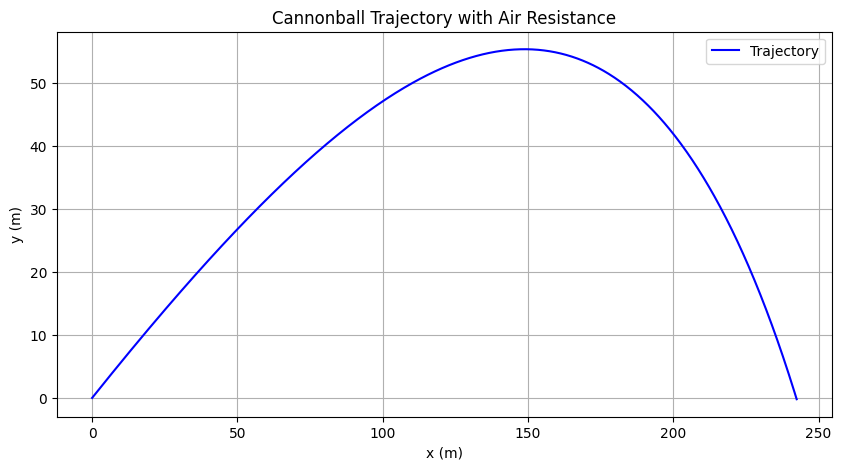

In [ ]:
#2b
import numpy as np
import matplotlib.pyplot as plt

# Constants
m = 1  # kg
R = 0.08  # meters
C = 0.47  # drag coefficient
rho = 1.22  # kg/m^3
g = 9.81  # m/s^2

# Initial conditions
t0, tf, dt = 0, 20, 0.01  # Time range and step size
t = np.arange(t0, tf, dt)

v0 = 100  # m/s
theta = np.radians(30)  # Launch angle
x0, y0 = 0, 0
vx0, vy0 = v0 * np.cos(theta), v0 * np.sin(theta)

# Function to compute derivatives
def derivatives(state):
    x, y, vx, vy = state
    v = np.sqrt(vx**2 + vy**2)
    ax = - (0.5 * R**2 * C * rho*np.pi / m) * v * vx
    ay = -g - (0.5 * R**2 * C * rho*np.pi / m) * v * vy
    return np.array([vx, vy, ax, ay])

# Numerical integration using Runge-Kutta (RK4)
def runge_kutta(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        k1 = f(y[i]) * dt
        k2 = f(y[i] + k1 / 2) * dt
        k3 = f(y[i] + k2 / 2) * dt
        k4 = f(y[i] + k3) * dt
        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        if y[i+1, 1] < 0:  # Stop when the projectile hits the ground
            return y[:i+2]
    return y

# Solve the equations
y0 = np.array([x0, y0, vx0, vy0])
solution = runge_kutta(derivatives, y0, t)

# Extract trajectory
x_vals, y_vals = solution[:, 0], solution[:, 1]

# Plot trajectory
plt.figure(figsize=(10, 5))
plt.plot(x_vals, y_vals, label='Trajectory', color='b')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Cannonball Trajectory with Air Resistance')
plt.legend()
plt.grid()
plt.show()


We see that as we increase the mass the distance incrases and after a certain point reaches a platuea


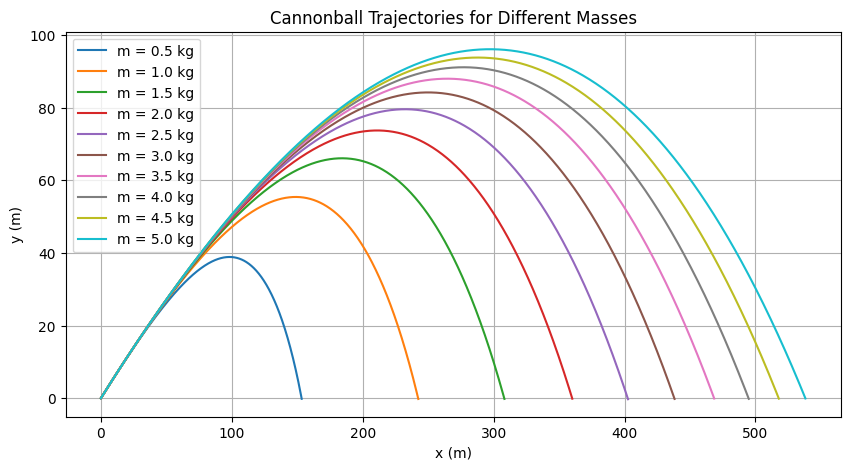

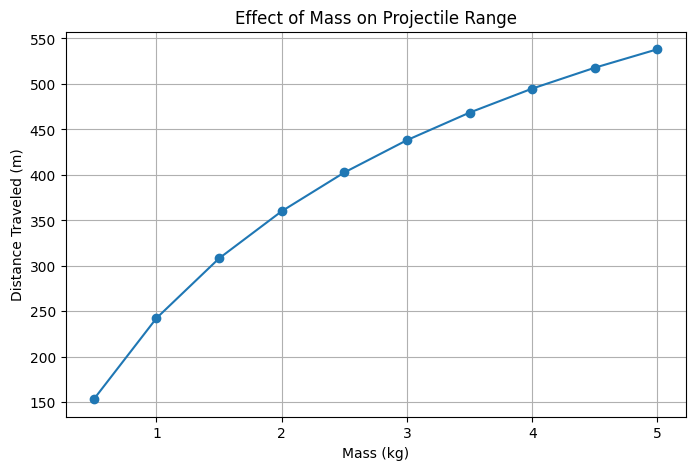

In [ ]:
#2c
import numpy as np
import matplotlib.pyplot as plt

# Constants
R = 0.08  # meters
C = 0.47  # drag coefficient
rho = 1.22  # kg/m^3
g = 9.81  # m/s^2

# Initial conditions
t0, tf, dt = 0, 20, 0.01  # Time range and step size
t = np.arange(t0, tf, dt)

v0 = 100  # m/s
theta = np.radians(30)  # Launch angle
x0, y0 = 0, 0

# Function to compute derivatives
def derivatives(state, m):
    x, y, vx, vy = state
    v = np.sqrt(vx**2 + vy**2)
    ax = - (0.5 * R**2 * C * rho*np.pi / m) * v * vx
    ay = -g - (0.5 * R**2 * C * rho*np.pi / m) * v * vy
    return np.array([vx, vy, ax, ay])

# Numerical integration using Runge-Kutta (RK4)
def runge_kutta(f, y0, t, m):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        k1 = f(y[i], m) * dt
        k2 = f(y[i] + k1 / 2, m) * dt
        k3 = f(y[i] + k2 / 2, m) * dt
        k4 = f(y[i] + k3, m) * dt
        y[i + 1] = y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        if y[i+1, 1] < 0:  # Stop when the projectile hits the ground
            return y[:i+2]
    return y

# Experiment: Varying mass values
masses = np.linspace(0.5, 5, 10)  # From 0.5 kg to 5 kg
ranges = []

plt.figure(figsize=(10, 5))
for m in masses:
    vx0, vy0 = v0 * np.cos(theta), v0 * np.sin(theta)
    y0_state = np.array([x0, y0, vx0, vy0])
    solution = runge_kutta(derivatives, y0_state, t, m)
    x_vals, y_vals = solution[:, 0], solution[:, 1]
    plt.plot(x_vals, y_vals, label=f'm = {m:.1f} kg')
    ranges.append(x_vals[-1])


print("We see that as we increase the mass the distance incrases and after a certain point reaches a platuea")
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Cannonball Trajectories for Different Masses')
plt.legend()
plt.grid()
plt.show()

# Plot distance traveled vs. mass
plt.figure(figsize=(8, 5))
plt.plot(masses, ranges, marker='o', linestyle='-')
plt.xlabel('Mass (kg)')
plt.ylabel('Distance Traveled (m)')
plt.title('Effect of Mass on Projectile Range')
plt.grid()
plt.show()


3a.
Convert the second-order differential equations into a system of first-order equations

Define:
$v_x = \frac{dx}{dt}, \quad v_y = \frac{dy}{dt}$

The second-order equations for a comet under the gravitational influence of the Sun are:
$
\frac{d^2x}{dt^2} = -\frac{GMx}{r^3}, \quad \frac{d^2y}{dt^2} = -\frac{GMy}{r^3}
$

where
$
r = \sqrt{x^2 + y^2}$

We convert this to the following system of first-order differential equations:

$\frac{dx}{dt} = v_x$

$\frac{dy}{dt} = v_y$

$\frac{dv_x}{dt} = -\frac{GMx}{r^3}$

$\frac{dv_y}{dt} = -\frac{GMy}{r^3}$

1e5 time step was too large and gave wrong results
1e3 time step was too small and took 5 min and 47 seconds
1e4 time step took only 35 seconds and gave accurate results


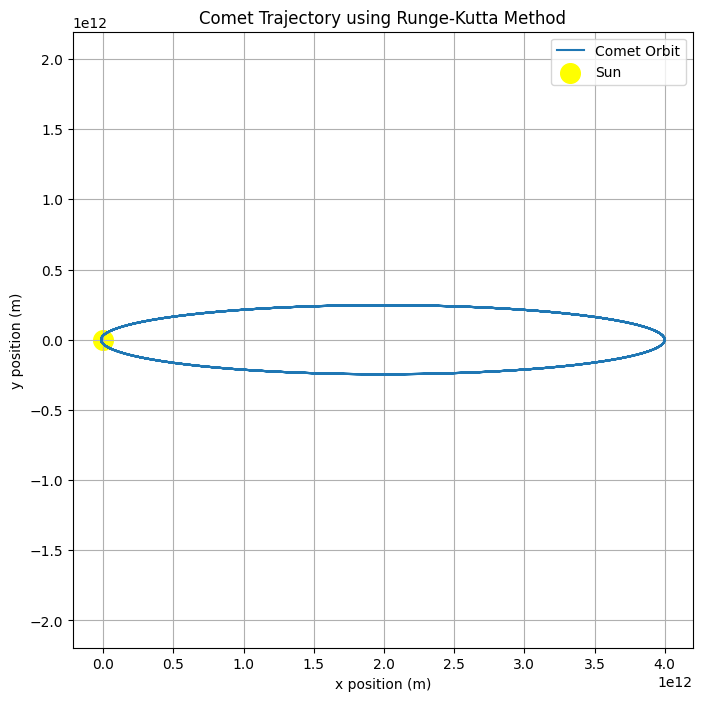

In [ ]:
#3b
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # m^3 kg^-1 s^-2
M = 1.989e30     # kg (mass of the Sun)

# Initial conditions
x0 = 4.0e12   # m (4 billion km)
y0 = 0.0      # m
vx0 = 0.0     # m/s
vy0 = 500.0   # m/s

# Time parameters
h = 1e4  # time step in seconds (~1.16 days)
t_max = 1e10  # total simulation time in seconds
n_steps = int(t_max / h)

# Function defining the derivatives
def derivatives(state):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    ax = -G * M * x / r**3
    ay = -G * M * y / r**3
    return np.array([vx, vy, ax, ay])

# Runge-Kutta 4th order integration
def runge_kutta4(state, h):
    k1 = derivatives(state)
    k2 = derivatives(state + 0.5 * h * k1)
    k3 = derivatives(state + 0.5 * h * k2)
    k4 = derivatives(state + h * k3)
    return state + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)

# Simulation loop
state = np.array([x0, y0, vx0, vy0])
trajectory = []

for _ in range(n_steps):
    trajectory.append(state[:2])
    state = runge_kutta4(state, h)

trajectory = np.array(trajectory)


print("1e5 time step was too large and gave wrong results")
print("1e3 time step was too small and took 5 min and 47 seconds")
print("1e4 time step took only 35 seconds and gave accurate results")
# Plotting
plt.figure(figsize=(8, 8))
plt.plot(trajectory[:, 0], trajectory[:, 1], label='Comet Orbit')
plt.scatter(0, 0, color='yellow', marker='o', s=200, label='Sun')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Comet Trajectory using Runge-Kutta Method')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()


Even with starting timestep 1e3 the simulation ran in a second


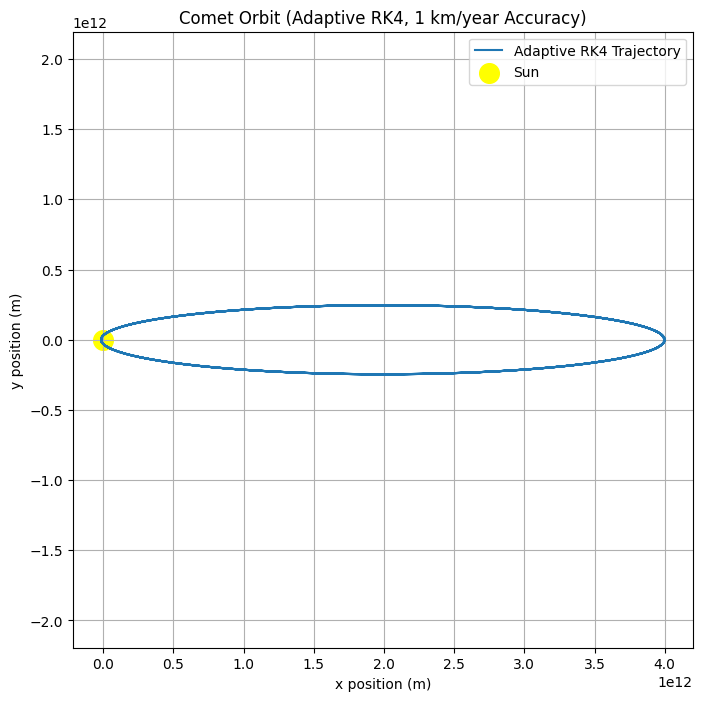

In [ ]:
#3c
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # gravitational constant
M = 1.989e30     # mass of the Sun

# Initial conditions (4 billion km from the Sun)
x0, y0 = 4.0e12, 0.0
vx0, vy0 = 0.0, 500.0

# Gravitational derivative function
def derivatives(state, t):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    ax = -G * M * x / r**3
    ay = -G * M * y / r**3
    return np.array([vx, vy, ax, ay], dtype=float)

# Classic RK4 step
def rk4_step(f, r, t, h):
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    return r + (k1 + 2*k2 + 2*k3 + k4) / 6

# Adaptive RK4 method with position accuracy control
def adaptive_rk4(f, t0, r0, t_end, h0, tol_pos):
    t = t0
    r = r0
    h = h0
    t_values = [t]
    r_values = [r]

    while t < t_end:
        # Perform one full step and two half steps
        r_full = rk4_step(f, r, t, h)
        r_half1 = rk4_step(f, r, t, h/2)
        r_half2 = rk4_step(f, r_half1, t + h/2, h/2)

        # Estimate position error (difference between methods)
        pos_error = np.linalg.norm(r_half2[:2] - r_full[:2])
        ro = 30.0 * h * tol_pos / (pos_error + 1e-10)

        # Accept or reject the step
        if ro >= 1:
            t += h
            r = r_half2
            t_values.append(t)
            r_values.append(r)
            h *= 1.5
        else:
            h *= .5

    return np.array(t_values), np.array(r_values)

# Simulation parameters
t0 = 0
r0 = np.array([x0, y0, vx0, vy0], dtype=float)
years = 150
t_end = 1e10#years * 365.25 * 24 * 3600  # seconds in 150 years
h0 = 1e3  # initial step: ~1 day
target_pos_error_km_per_year = 1.0  # km/year

# Convert to meters per second
tol_pos = (target_pos_error_km_per_year * 1e3) / (365.25 * 24 * 3600)  # m/s

# Run simulation
t_vals, r_vals = adaptive_rk4(derivatives, t0, r0, t_end, h0, tol_pos)

print("Even with starting timestep 1e3 the simulation ran in a second")
# Plot results
plt.figure(figsize=(8, 8))
plt.plot(r_vals[:, 0], r_vals[:, 1], label='Adaptive RK4 Trajectory')
plt.scatter(0, 0, color='yellow', s=200, label='Sun')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.axis('equal')
plt.grid(True)
plt.title('Comet Orbit (Adaptive RK4, 1 km/year Accuracy)')
plt.legend()
plt.show()


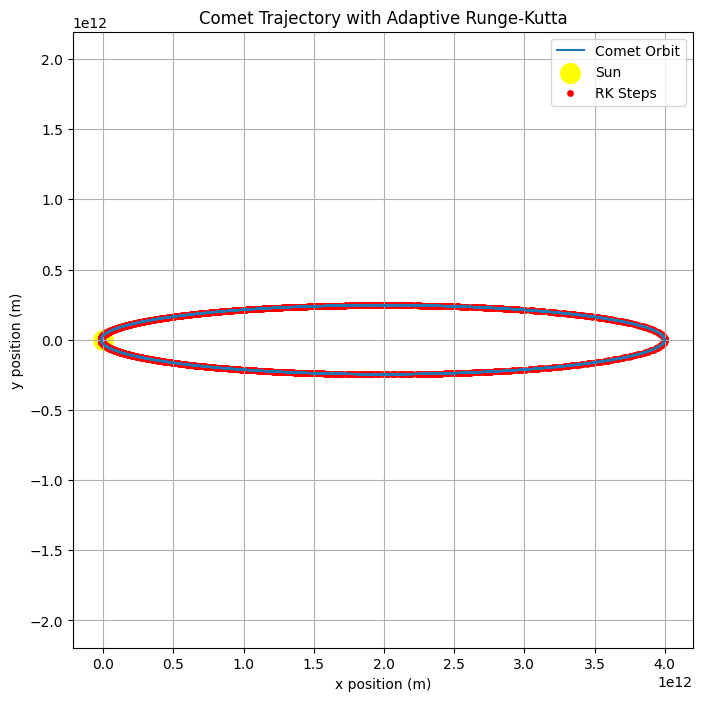

In [ ]:
#3d
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # gravitational constant
M = 1.989e30     # mass of the Sun

# Initial conditions (4 billion km from Sun)
x0, y0 = 4.0e12, 0.0
vx0, vy0 = 0.0, 500.0

# Derivative function for RK4
def derivatives(state, t):
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    ax = -G * M * x / r**3
    ay = -G * M * y / r**3
    return np.array([vx, vy, ax, ay], dtype=float)

# RK4 step
def rk4_step(f, r, t, h):
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    return r + (k1 + 2*k2 + 2*k3 + k4) / 6

# Adaptive RK4 with position accuracy
def adaptive_rk4(f, t0, r0, t_end, h0, tol_pos):
    t = t0
    r = r0
    h = h0
    t_values = [t]
    r_values = [r[:2]]  # positions only

    while t < t_end:
        r_full = rk4_step(f, r, t, h)
        r_half1 = rk4_step(f, r, t, h/2)
        r_half2 = rk4_step(f, r_half1, t + h/2, h/2)

        pos_error = np.linalg.norm(r_half2[:2] - r_full[:2])
        ro = 30.0 * h * tol_pos / (pos_error + 1e-10)

        if ro >= 1:
            t += h
            r = r_half2
            t_values.append(t)
            r_values.append(r[:2])
            h *= 1.5
        else:
            h *= 0.5

    return np.array(t_values), np.array(r_values)

# Simulation parameters
t0 = 0
r0 = np.array([x0, y0, vx0, vy0], dtype=float)
t_end = 1e10#1 * 365.25 * 24 * 3600  # simulate 1 year
h0 = 1e5  # ~1 day
tol_pos = 1e3 / (365.25 * 24 * 3600)  # 1 km/year in m/s

# Run simulation
t_vals, step_positions = adaptive_rk4(derivatives, t0, r0, t_end, h0, tol_pos)

# Plot
plt.figure(figsize=(8, 8))
plt.plot(step_positions[:, 0], step_positions[:, 1], label='Comet Orbit')
plt.scatter(0, 0, color='yellow', marker='o', s=200, label='Sun')
plt.scatter(step_positions[:, 0], step_positions[:, 1], color='red', s=15, label='RK Steps')
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Comet Trajectory with Adaptive Runge-Kutta')
plt.legend()
plt.grid()
plt.axis('equal')
plt.show()